# proyecto 11_aprendizaje_automatico_negocios

**Descripción del proyecto**

Trabajas en la compañía de extracción de petróleo OilyGiant. Tu tarea es encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.

Para completar esta tarea, tendrás que realizar los siguientes pasos:

Leer los archivos con los parámetros recogidos de pozos petrolíferos en la región seleccionada: calidad de crudo y volumen de reservas.
Crear un modelo para predecir el volumen de reservas en pozos nuevos.
Elegir los pozos petrolíferos que tienen los valores estimados más altos.
Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados.
Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

## Paso 1. Cargar los datos

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

Descarga y prepara los datos. Explica el procedimiento.

In [11]:
df_1 = pd.read_csv('geo_data_0.csv')

In [12]:
df_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [14]:
df_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [15]:
df_1["id"].duplicated().sum()

np.int64(10)

In [16]:
df_1=df_1.drop_duplicates(subset=['id'], keep='first')

In [17]:
df1=df_1.drop(['id'], axis=1)
df1

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...
99995,0.971957,0.370953,6.075346,110.744026
99996,1.392429,-0.382606,1.273912,122.346843
99997,1.029585,0.018787,-1.348308,64.375443
99998,0.998163,-0.528582,1.583869,74.040764


In [18]:
df_2 = pd.read_csv('geo_data_1.csv')

In [19]:
df_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [20]:
df_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [21]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [22]:
df_2["id"].duplicated().sum()

np.int64(4)

In [23]:
df_2=df_2.drop_duplicates(subset=['id'], keep='first')

In [24]:
df2 = df_2.drop(['id'], axis=1)
df2

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...
99995,9.535637,-6.878139,1.998296,53.906522
99996,-10.160631,-12.558096,5.005581,137.945408
99997,-7.378891,-3.084104,4.998651,137.945408
99998,0.665714,-6.152593,1.000146,30.132364


In [25]:
df_3 = pd.read_csv('geo_data_2.csv')

In [26]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [27]:
df_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [28]:
df_3["id"].duplicated().sum()

np.int64(4)

In [29]:
df_3=df_3.drop_duplicates(subset=['id'], keep='first')

In [30]:
df3 = df_3.drop(['id'], axis=1)
df3

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...
99995,-1.777037,1.125220,6.263374,172.327046
99996,-1.261523,-0.894828,2.524545,138.748846
99997,-1.199934,-2.957637,5.219411,157.080080
99998,-2.419896,2.417221,-5.548444,51.795253


In [31]:
df3.describe()

,f0,f1,f2,product
count,99996.000000,99996.000000,99996.000000,99996.000000
mean,0.002002,-0.002159,2.495084,94.998342
std,1.732052,1.730397,3.473482,44.749573
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162328,-1.174841,0.130269,59.450028
50%,0.009424,-0.009661,2.484236,94.925026
75%,1.158477,1.163523,4.858720,130.586815
max,7.238262,7.844801,16.739402,190.029838


#### Explicación del procedimiento

Descargamos los datos para poder observarlos mas a detalle, los data frame estan compuestos por cuatro filas, el id de los pozos, las características y los resultados, en este caso para limpiar solo eliminamos la columna ID de los pozos que es una columna que no es necesaria, en este caso no fue necesario rellenar los datos. 

## Paso 2. Entrena y prueba el modelo para cada región en geo_data_0.csv

### Entrenamiento region 1

In [32]:
features = df1.drop(['product'], axis=1)

In [33]:
target = df1['product']

In [34]:
features_train1, features_valid1, target_train1, target_valid1 = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [35]:
scaler= StandardScaler()
scaler.fit(features_train1)
features_train1_scaled= scaler.transform(features_train1)
features_valid1_scaled= scaler.transform(features_valid1)

In [36]:
model = LinearRegression()
model.fit(features_train1_scaled, target_train1)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
predictions_valid1= model.predict(features_valid1_scaled)

In [38]:
RMSE1= mean_squared_error(target_valid1, predictions_valid1) ** 0.5
RMSE1

37.853527328872964

In [39]:
volumen_medio1=predictions_valid1.mean()
volumen_medio1

np.float64(92.78915638280621)

### Entrenamiento region 2

In [40]:
features = df2.drop(['product'], axis=1)
target = df2['product']
features_train2, features_valid2, target_train2, target_valid2 = train_test_split(
    features, target, test_size=0.25, random_state=12345)
scaler= StandardScaler()
scaler.fit(features_train2)
features_train2_scaled= scaler.transform(features_train2)
features_valid2_scaled= scaler.transform(features_valid2)
model = LinearRegression()
model.fit(features_train2_scaled, target_train2)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
predictions_valid2 = model.predict(features_valid2_scaled)

In [42]:
RMSE2= mean_squared_error(target_valid2, predictions_valid2) ** 0.5
RMSE2

0.8920592647717037

In [43]:
volumen_medio2=predictions_valid2.mean()
volumen_medio2

np.float64(69.1783195703043)

### Entrenamiento region 3

In [44]:
features = df3.drop(['product'], axis=1)
target = df3['product']
features_train3, features_valid3, target_train3, target_valid3 = train_test_split(
    features, target, test_size=0.25, random_state=12345)
scaler= StandardScaler()
scaler.fit(features_train3)
features_train3_scaled= scaler.transform(features_train3)
features_valid3_scaled= scaler.transform(features_valid3)
model = LinearRegression()
model.fit(features_train3_scaled, target_train3)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
predictions_valid3= model.predict(features_valid3_scaled)

In [46]:
RMSE3= mean_squared_error(target_valid3, predictions_valid3) ** 0.5
RMSE3

40.07585073246016

In [47]:
volumen_medio3=predictions_valid3.mean()
volumen_medio3

np.float64(94.86572480562035)

In [48]:
RMSE_values= [RMSE1, RMSE2, RMSE3]
etiquetas = ['Modelo 1', 'Modelo 2', 'Modelo 3']

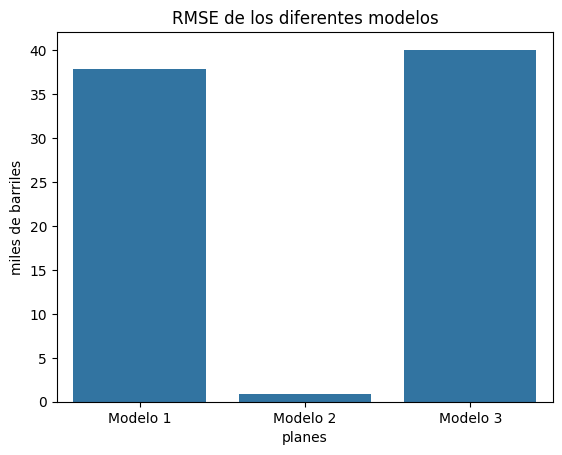

In [49]:
sns.barplot(x=etiquetas, y=RMSE_values)

plt.title("RMSE de los diferentes modelos")
plt.xlabel("planes")
plt.ylabel("miles de barriles")
plt.show()


In [50]:
volumen_medio=[volumen_medio1, volumen_medio2, volumen_medio3]
etiquetas=['modelo 1', 'modelo 2', 'modelo 3']

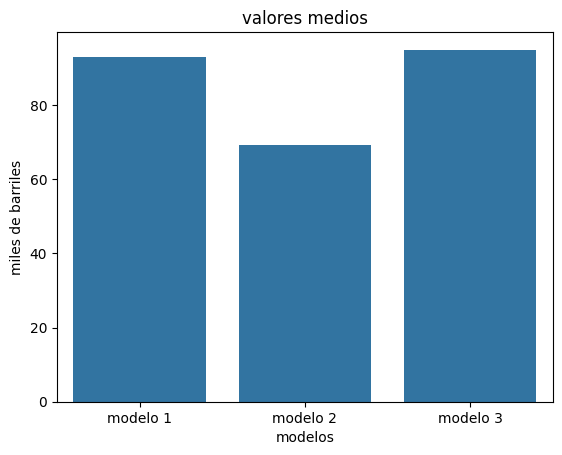

In [51]:
sns.barplot(x=etiquetas, y=volumen_medio)
plt.title("valores medios")
plt.xlabel("modelos")
plt.ylabel("miles de barriles")
plt.show()

#### Analisis de resultados 
Se puede observar que el RMSE tiene un número menor en el caso del DF2, esto quiere decir que el modelo 2 es el que mejores valores tiene, en el caso de los valores medios es mas alto el modelo 30

## Paso 3. Prepárate para el cálculo de ganancias:

### Almacenar los valores necesarios

In [52]:
mas_pozos1= np.sort(predictions_valid1)
mas_pozos1[len(mas_pozos1)-200:]

array([148.16922509, 148.20927324, 148.22746756, 148.26488134,
       148.2762014 , 148.28540823, 148.28996823, 148.43937614,
       148.45382525, 148.48873752, 148.52113854, 148.7252202 ,
       148.78753497, 148.87910329, 148.89755772, 148.97323435,
       149.04886935, 149.21026336, 149.2498395 , 149.28604934,
       149.3290386 , 149.34902725, 149.35606272, 149.4055953 ,
       149.45991747, 149.46174962, 149.47168853, 149.5650115 ,
       149.5848828 , 149.58625054, 149.61982799, 149.65271367,
       149.69404775, 149.69651893, 149.80114818, 149.81588062,
       149.8178134 , 149.91662939, 149.94185552, 150.13876556,
       150.17567419, 150.18481591, 150.29789199, 150.29940136,
       150.32075598, 150.49750071, 150.51874151, 150.58538853,
       150.65046192, 150.68765254, 150.70039334, 150.73433422,
       150.7352658 , 150.74840594, 150.79645521, 150.91417294,
       150.93765217, 150.96020781, 151.01697313, 151.13379013,
       151.16068371, 151.17848305, 151.42655128, 151.53

In [53]:

region1=pd.DataFrame(dict(predicted_value=predictions_valid1, real_value=target_valid1))
region1

,predicted_value,real_value
49468,103.950372,123.566299
55496,73.687869,63.442039
11690,101.015288,88.718000
13770,94.048415,51.422060
72395,87.559552,102.569999
...,...,...
7867,63.963223,32.531740
80676,139.862730,139.062332
45138,78.444653,55.953481
53545,71.082768,87.222042


In [54]:
mas_pozos2= np.sort(predictions_valid2)
mas_pozos2[len(mas_pozos2)-200:]

array([138.37906221, 138.37971583, 138.38005387, 138.38158828,
       138.38324111, 138.38337215, 138.38631292, 138.38747764,
       138.39204066, 138.39495813, 138.39912292, 138.40074903,
       138.40118142, 138.40433317, 138.40536472, 138.40687888,
       138.40783263, 138.41316357, 138.41338841, 138.41530974,
       138.41562784, 138.41689811, 138.42006386, 138.42008954,
       138.42080024, 138.42195611, 138.42246224, 138.42300332,
       138.43272728, 138.43282131, 138.43328517, 138.43659848,
       138.43845852, 138.43878664, 138.43879802, 138.45122715,
       138.45155889, 138.45347979, 138.45355799, 138.46359263,
       138.46369557, 138.46537767, 138.46834615, 138.47237982,
       138.47246989, 138.47300322, 138.47354514, 138.47463546,
       138.48044566, 138.48975064, 138.49685833, 138.49804526,
       138.49954568, 138.50213074, 138.50250539, 138.50338709,
       138.50590309, 138.50892907, 138.50939428, 138.51282895,
       138.51289881, 138.513987  , 138.51529092, 138.51

In [55]:
region2=pd.DataFrame(dict(predicted_value=predictions_valid2, real_value=target_valid2))
region2

,predicted_value,real_value
71748,53.407255,53.906522
80490,137.863458,137.945408
2655,29.745003,30.132364
71171,83.188229,84.038886
91141,1.242101,0.000000
...,...,...
18456,110.688350,110.992147
73032,81.716127,80.859783
54710,54.611428,53.906522
50911,107.578737,107.813044


In [56]:
mas_pozos3= np.sort(predictions_valid3)
mas_pozos3[len(mas_pozos3)-200:]

array([142.68527494, 142.6978546 , 142.71313812, 142.73497331,
       142.75311351, 142.77697314, 142.79260822, 142.86635469,
       142.89628991, 142.92825064, 142.98292117, 142.98628569,
       142.99645358, 143.00426362, 143.01980326, 143.0440891 ,
       143.05566095, 143.10571433, 143.11193431, 143.11833865,
       143.14961065, 143.1716215 , 143.18169623, 143.18721675,
       143.23203352, 143.23767555, 143.32625551, 143.32891329,
       143.35283251, 143.44580772, 143.4581378 , 143.47146807,
       143.47668437, 143.51709091, 143.56719102, 143.61157109,
       143.65900789, 143.68074481, 143.70979627, 143.72783499,
       143.73683661, 143.7597942 , 143.79810736, 143.82037617,
       143.82431819, 143.85236939, 143.93467888, 143.97267462,
       143.97560563, 144.12831638, 144.13434503, 144.19124341,
       144.28221524, 144.34642831, 144.36209859, 144.43869256,
       144.44150648, 144.48150328, 144.5157861 , 144.53286403,
       144.65490402, 144.65596208, 144.82892259, 144.85

In [57]:
region3=pd.DataFrame(dict(predicted_value=predictions_valid3, real_value=target_valid3))
region3

,predicted_value,real_value
71750,76.457565,97.651721
80492,109.417094,66.640660
2655,89.922620,57.776581
71173,83.701818,35.055066
91140,86.761173,82.047594
...,...,...
18456,95.591732,21.431303
73034,112.126588,155.104522
54711,62.367249,28.534893
50912,114.190814,41.027981


In [58]:
regiones=["region1","region2","region3"]
datos=[region1,region2,region3]

prediccion_region= dict(zip(regiones, datos))
prediccion_region


{'region1':        predicted_value  real_value
 49468       103.950372  123.566299
 55496        73.687869   63.442039
 11690       101.015288   88.718000
 13770        94.048415   51.422060
 72395        87.559552  102.569999
 ...                ...         ...
 7867         63.963223   32.531740
 80676       139.862730  139.062332
 45138        78.444653   55.953481
 53545        71.082768   87.222042
 17774        66.054854  138.866063
 
 [24998 rows x 2 columns],
 'region2':        predicted_value  real_value
 71748        53.407255   53.906522
 80490       137.863458  137.945408
 2655         29.745003   30.132364
 71171        83.188229   84.038886
 91141         1.242101    0.000000
 ...                ...         ...
 18456       110.688350  110.992147
 73032        81.716127   80.859783
 54710        54.611428   53.906522
 50911       107.578737  107.813044
 46409         1.969338    3.179103
 
 [24999 rows x 2 columns],
 'region3':        predicted_value  real_value
 71750   

### Conclusiones 
En este paso se almacenaron los datos de las condiciones del proyecto en variables separadas, posteriormente extraímos de los tres dataframes los 200 pozos mas redituables de la predicciones realizadas en el paso 2, posteriormente los juntamos con los objetivos de validación en un diccionario. 

## Paso 4.Escribe una función para calcular la ganancia de un conjunto de pozos de petróleo seleccionados y modela las predicciones:

### Calculo de la inversion 

In [59]:

barril_precio = 4.5
ingreso_unidad = 4500
presupuesto = 100_000_000
pozos= 200
valor_minimo = 500000


volumen_min= presupuesto/ingreso_unidad
volumen_min_pozo= volumen_min/pozos

print('valor_minimo', volumen_min)
print('unidades_equivalentes',volumen_min_pozo)

valor_minimo 22222.222222222223
unidades_equivalentes 111.11111111111111


In [60]:
def beneficio (df):
    mejor_pozo= df.sort_values(by='predicted_value', ascending=False)['real_value'].head(200)
    mejor_volumen = mejor_pozo.sum()
    beneficio= ((mejor_volumen*ingreso_unidad)-presupuesto)
    return beneficio 

In [61]:
print('el mejor beneficio para la region 1 es', beneficio(prediccion_region['region1']))

el mejor beneficio para la region 1 es 33651872.377002865


In [62]:
print('el mejor beneficio para la region 2 es', beneficio(prediccion_region['region2']))

el mejor beneficio para la region 2 es 24150866.966815114


In [63]:
print('el mejor beneficio para la region 3 es', beneficio(prediccion_region['region3']))

el mejor beneficio para la region 3 es 25012838.532820627


In [64]:
volumen_medio3 * ingreso_unidad

np.float64(426895.76162529155)

### Elegir los doscientos pozos con los valores de predicción más altos

In [65]:
primeros1=df_1['product'].sort_values(ascending=False)
primeros1

8826     185.364347
99818    185.362690
94175    185.355615
1925     185.354980
45291    185.352015
            ...    
55969      0.021781
5105       0.009428
58769      0.006114
97721      0.004022
57263      0.000000
Name: product, Length: 99990, dtype: float64

In [66]:
primeros_pozos1=primeros1.head(200)
primeros_pozos1

8826     185.364347
99818    185.362690
94175    185.355615
1925     185.354980
45291    185.352015
            ...    
34856    184.366474
54135    184.362338
63598    184.360762
4941     184.358756
79494    184.356455
Name: product, Length: 200, dtype: float64

In [67]:
primeros2=df_2['product'].sort_values(ascending=False)
primeros2

9        137.945408
99997    137.945408
99996    137.945408
99993    137.945408
24885    137.945408
            ...    
19566      0.000000
41178      0.000000
41175      0.000000
2709       0.000000
41202      0.000000
Name: product, Length: 99996, dtype: float64

In [68]:
primeros_pozos2=primeros2.head(200)
primeros_pozos2

9        137.945408
99997    137.945408
99996    137.945408
99993    137.945408
24885    137.945408
            ...    
24502    137.945408
24503    137.945408
25859    137.945408
25860    137.945408
25869    137.945408
Name: product, Length: 200, dtype: float64

In [69]:
primeros3=df_3['product'].sort_values(ascending=False)
primeros3

79705    190.029838
93444    190.013589
35099    190.011722
21943    190.010982
37870    190.010029
            ...    
39815      0.014039
31253      0.009761
32261      0.009204
43452      0.004606
68149      0.000000
Name: product, Length: 99996, dtype: float64

In [70]:
primeros_pozos3=primeros3.head(200)
primeros_pozos3

79705    190.029838
93444    190.013589
35099    190.011722
21943    190.010982
37870    190.010029
            ...    
96482    189.038807
53814    189.038746
5138     189.037389
91855    189.024650
51559    189.024253
Name: product, Length: 200, dtype: float64

In [71]:
primeros_pozos1.sum()

np.float64(36966.747929072015)

In [72]:
primeros_pozos2.sum()

np.float64(27589.081548181137)

In [73]:
primeros_pozos3.sum()

np.float64(37910.29539635329)

In [74]:
def ganancia(primeros_pozos):
    ingreso_unidad = 4500
    valor_minimo = 500000
    pozos_mas_valiosos= []
    for product in primeros_pozos:  
        result = product * ingreso_unidad-valor_minimo
        pozos_mas_valiosos.append(result)
    return pozos_mas_valiosos

In [75]:
ganacia_de_pozos1=ganancia(primeros_pozos1)

In [76]:
ganancia1=pd.Series(ganacia_de_pozos1)

In [77]:
ganancia_pozos1= pd.concat([primeros_pozos1.reset_index(drop=True), ganancia1.reset_index(drop=True)], axis=1, ignore_index=True)
ganancia_pozos1.rename(columns={0:'product', 1:'revenue'}, inplace=True)
ganancia_pozos1

,product,revenue
0,185.364347,334139.563400
1,185.362690,334132.106135
2,185.355615,334100.267644
3,185.354980,334097.411333
4,185.352015,334084.066885
...,...,...
195,184.366474,329649.133956
196,184.362338,329630.521766
197,184.360762,329623.429554
198,184.358756,329614.400927


In [78]:
ganancia_pozos1.mean()

product       184.833740
revenue    331751.828404
dtype: float64

In [79]:
ganacia_de_pozos2=ganancia(primeros_pozos2)
ganancia2=pd.Series(ganacia_de_pozos2)
ganancia_pozos2= pd.concat([primeros_pozos2.reset_index(drop=True), ganancia2.reset_index(drop=True)], axis=1, ignore_index=True)
ganancia_pozos2.rename(columns={0:'product', 1:'revenue'}, inplace=True)
ganancia_pozos2

,product,revenue
0,137.945408,120754.334834
1,137.945408,120754.334834
2,137.945408,120754.334834
3,137.945408,120754.334834
4,137.945408,120754.334834
...,...,...
195,137.945408,120754.334834
196,137.945408,120754.334834
197,137.945408,120754.334834
198,137.945408,120754.334834


In [80]:
ganancia_pozos2.mean()

product       137.945408
revenue    120754.334834
dtype: float64

In [81]:
ganacia_de_pozos3=ganancia(primeros_pozos3)
ganancia3=pd.Series(ganacia_de_pozos3)
ganancia_pozos3= pd.concat([primeros_pozos3.reset_index(drop=True), ganancia3.reset_index(drop=True)], axis=1, ignore_index=True)
ganancia_pozos3.rename(columns={0:'product', 1:'revenue'}, inplace=True)
ganancia_pozos3

,product,revenue
0,190.029838,355134.272545
1,190.013589,355061.150491
2,190.011722,355052.750786
3,190.010982,355049.417268
4,190.010029,355045.130561
...,...,...
195,189.038807,350674.631471
196,189.038746,350674.355682
197,189.037389,350668.249019
198,189.024650,350610.924811


In [82]:
ganancia_pozos3.mean()

product       189.551477
revenue    352981.646418
dtype: float64

Al menos a simple vista, se puede ver que la utilidad es mayor en el modelo 3 debido a que la ganancia es mayor, así como el promedio de los pozos petroleros es mucho mas alto que en comparación con los otros dos DF.

#### Posible región para el desarrollo de pozos petroliferos 


## Paso 5. Calcula riesgos y ganancias para cada región:

### Utilizando las predicciones que almacenaste en el paso 4.2, emplea la técnica del bootstrapping con 1000 muestras para hallar la distribución de los beneficios.

In [83]:
state= np.random.RandomState(12345)

In [84]:
def riesgo_ganancia (df,n_muestras=1000):
    beneficios_muestras=[]
    for i in range(n_muestras):
        mejor_muestra=df.sample(n=500, replace=True, random_state=state)
        beneficios_muestras.append(beneficio(mejor_muestra))
    beneficios_muestras=pd.Series(beneficios_muestras)
    return beneficios_muestras

In [85]:
riesgo_region1=riesgo_ganancia(prediccion_region['region1'])

In [86]:
riesgo_region2=riesgo_ganancia(prediccion_region['region2'])

In [87]:
riesgo_region3=riesgo_ganancia(prediccion_region['region3'])

In [88]:
def beneficio_promedio(beneficios_muestras, region):
    promedio_muestras=beneficios_muestras.mean()
    menor_valor=beneficios_muestras.quantile(0.025)
    mayor_valor=beneficios_muestras.quantile(0.975)
    perdidas=((beneficios_muestras<0).mean())
    
    print(f'intervalos de confianza para {region}:', (menor_valor,mayor_valor))
    print(f'beneficio promedio para {region}:', (promedio_muestras))
    print(f'riesgo para {region}: {perdidas:%}')
    print('.'*50)

In [89]:
beneficios= {}
for region, data in prediccion_region.items():
    serie_beneficios=riesgo_ganancia(data)
    beneficio_promedio(serie_beneficios, region)
    beneficios[region]=serie_beneficios

intervalos de confianza para region1: (np.float64(-1006201.0814758241), np.float64(9248145.742163748))
beneficio promedio para region1: 3914824.352151987
riesgo para region1: 7.300000%
..................................................
intervalos de confianza para region2: (np.float64(981071.469508632), np.float64(8652814.440151801))
beneficio promedio para region2: 4792450.837530031
riesgo para region2: 1.000000%
..................................................
intervalos de confianza para region3: (np.float64(-2152806.674543876), np.float64(8532555.031311369))
beneficio promedio para region3: 3461913.3099990846
riesgo para region3: 9.900000%
..................................................


Definitivamente la mejor opción es la región 2, debido a que tienen el menor riesgo y tiene la inversión mas alta, además es importante decir que los intervalos de confianza se encuentra este resultado es una gran sorpresa ya que originalmente a simple vista era la región 3 la que tenía mejores indicadores, pero no es así. 